In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from copy import copy
import bisect
from src.utils import loubar_thres 

In [2]:
arr = np.random.beta(2,200,1000)
arr.sort()
# arr

In [3]:
mean = arr.mean()
mean_idx = bisect.bisect(arr, arr.mean())
mean_pos = mean_idx/arr.size
mean, mean_pos, mean_idx

(0.009866627934034743, 0.591, 591)

In [4]:
lonrenz_y = arr.cumsum() / arr.sum()
lonrenz_y = np.insert(lonrenz_y, 0, 0) 
x_axis = np.arange(lonrenz_y.size)/(lonrenz_y.size-1)

slope = (lonrenz_y[-1] - lonrenz_y[-2])/(x_axis[-1]-x_axis[-2])
loubar = (slope-1)/slope

thres_idx = int(np.ceil((lonrenz_y.size-1)*loubar))-1
arr_thres = arr[thres_idx]

arr_thres, loubar, thres_idx

(0.014708977642084852, 0.8033020161539592, 803)

In [6]:
loubar_thres(arr,is_sorted=True)

(0.8033020161539592, 0.014708977642084852)

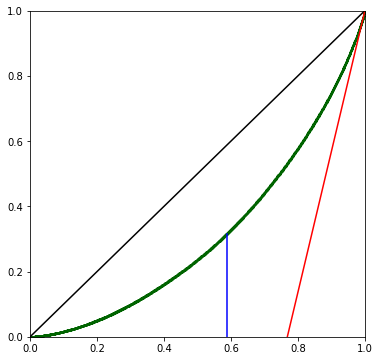

In [148]:
fig, ax = plt.subplots(figsize=[6,6])
plt.ylim(0,1)
plt.xlim(0,1)
## scatter plot of Lorenz curve
ax.scatter(np.arange(lonrenz_y.size)/(lonrenz_y.size-1), lonrenz_y, 
           marker='x', color='darkgreen', s=3)
## line plot of equality
ax.plot([0,1], [0,1], color='k')
ax.plot([loubar, 1], [0, 1], color='r')
ax.plot([mean_pos, mean_pos], [0, lonrenz_y[mean_idx]], color='blue')